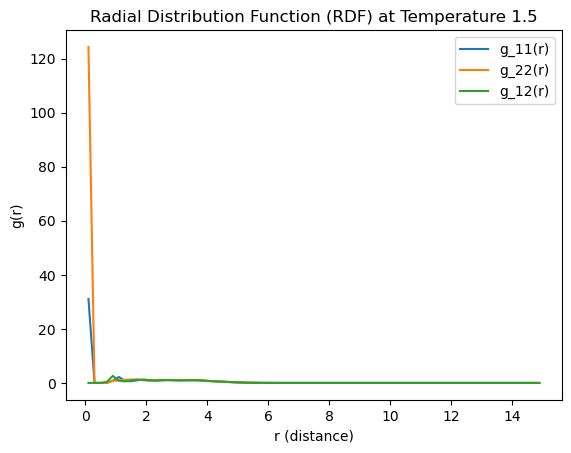

<Figure size 640x480 with 0 Axes>

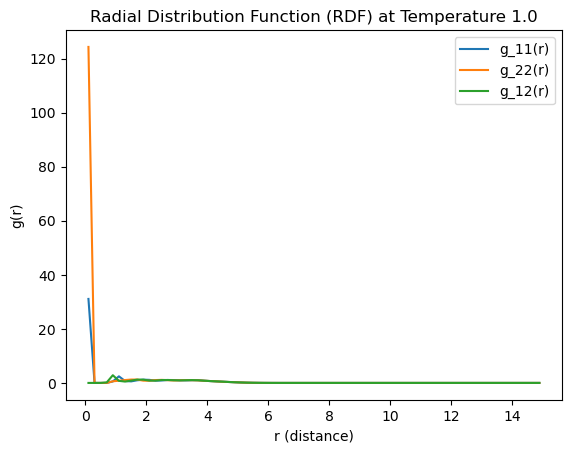

<Figure size 640x480 with 0 Axes>

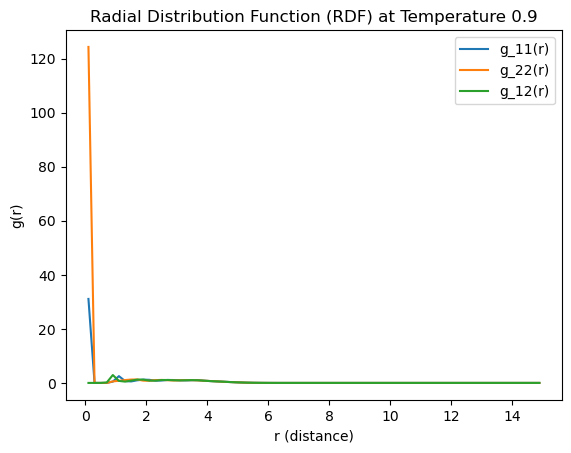

<Figure size 640x480 with 0 Axes>

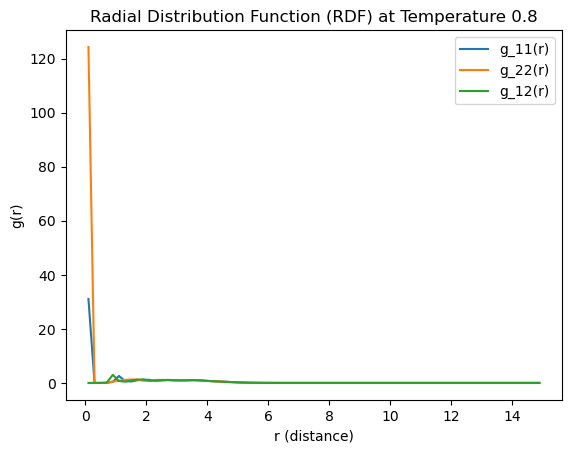

<Figure size 640x480 with 0 Axes>

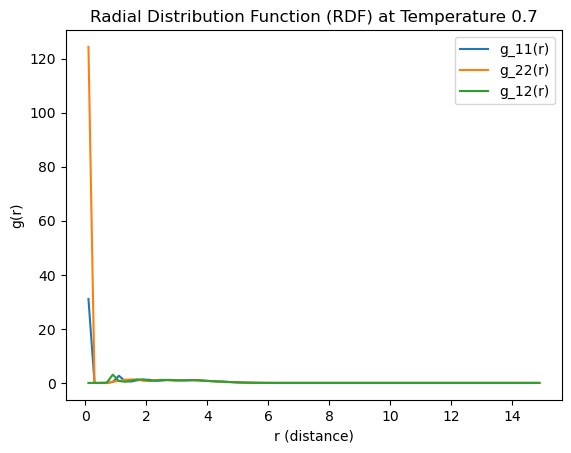

<Figure size 640x480 with 0 Axes>

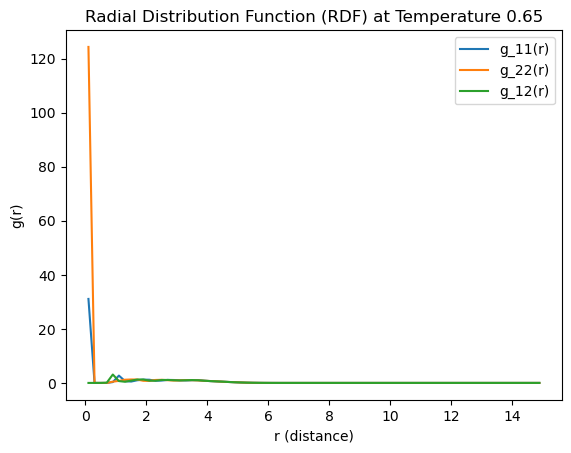

<Figure size 640x480 with 0 Axes>

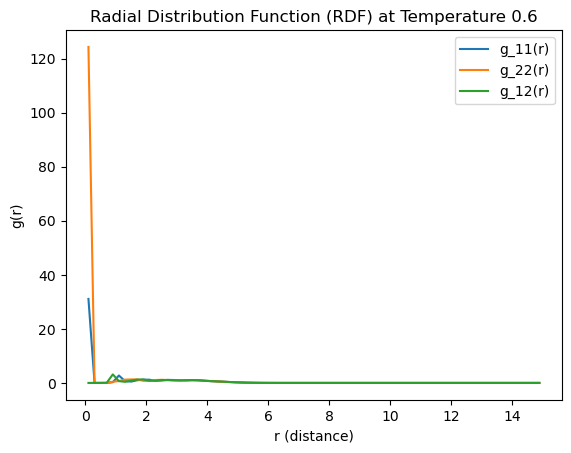

<Figure size 640x480 with 0 Axes>

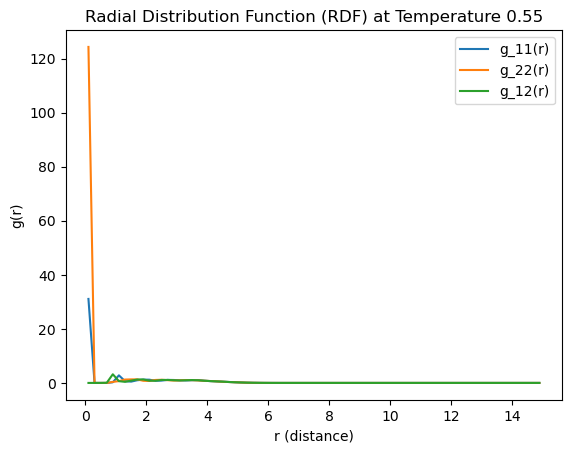

OSError: DCD file does not exist

<Figure size 640x480 with 0 Axes>

In [6]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt

temperature_files = {
    1.5: "kalj_T1.5_n480_v400_10000_1",
    1.0: "kalj_T1_n480_v400_50000_1",
    0.9: "kalj_T0.9_n480_v400_150000_1",
    0.8: "kalj_T0.8_n480_v400_150000_1",
    0.7: "kalj_T0.7_n480_v400_180000_1",
    0.65: "kalj_T0.65_n480_v400_350000_1",
    0.6: "kalj_T0.6_n480_v400_1000000_1",
    0.55: "kalj_T0.55_n480_v400_3000000_1",
    0.5: "kalj_T0.5_n480_v400_10000000_1",
    # 0.475: "kalj_T0.475_n480_v400_300000000_1"
}

for T, filename in temperature_files.items():
    u = mda.Universe(f"./Data/equil/{filename}.lammpstrj", 
                     f"./Data/prod/{filename}.unwrap.dcd", 
                     topology_format="LAMMPSDUMP")
    
    type1 = u.select_atoms("type 1")
    type2 = u.select_atoms("type 2")
    
    rdf_11 = InterRDF(type1, type1)
    rdf_22 = InterRDF(type2, type2)
    rdf_12 = InterRDF(type1, type2)
    
    rdf_11.run()
    rdf_22.run()
    rdf_12.run()
    
    plt.figure()
    plt.plot(rdf_11.results.bins, rdf_11.results.rdf, label="g_11(r)")
    plt.plot(rdf_22.results.bins, rdf_22.results.rdf, label="g_22(r)")
    plt.plot(rdf_12.results.bins, rdf_12.results.rdf, label="g_12(r)")
    plt.xlabel("r (distance)")
    plt.ylabel("g(r)")
    plt.legend()
    plt.title(f"Radial Distribution Function (RDF) at Temperature {T}")
    plt.show()

    plt.savefig(f"./figures/n480/RDF_T{T}.png")

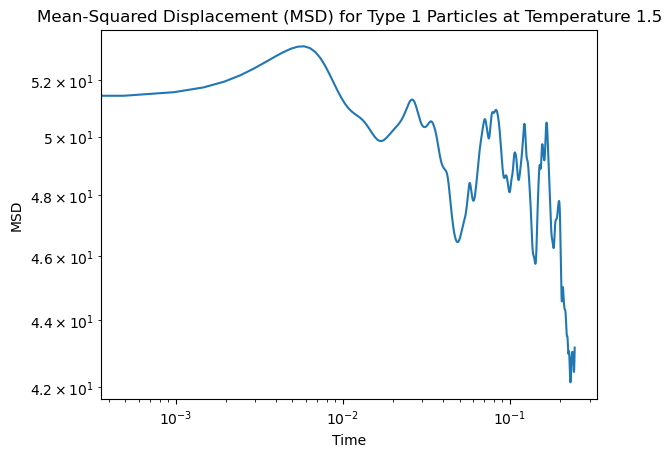

<Figure size 640x480 with 0 Axes>

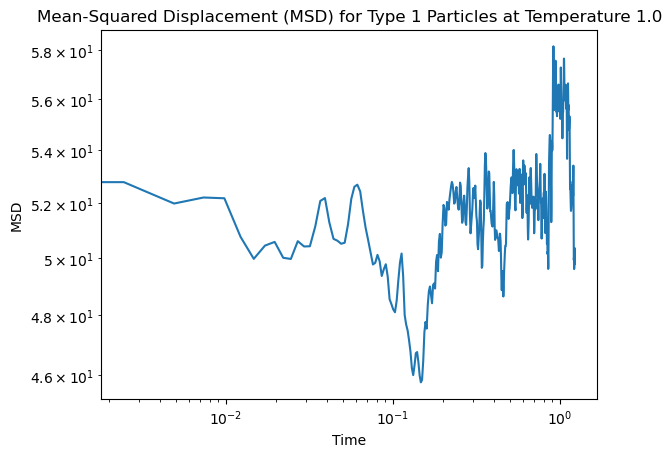

<Figure size 640x480 with 0 Axes>

Exception ignored in: <function ReaderBase.__del__ at 0x14bc6a80f820>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/base.py", line 1403, in __del__
    self.close()
  File "/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py", line 167, in close
    self._file.close()
AttributeError: 'DCDReader' object has no attribute '_file'


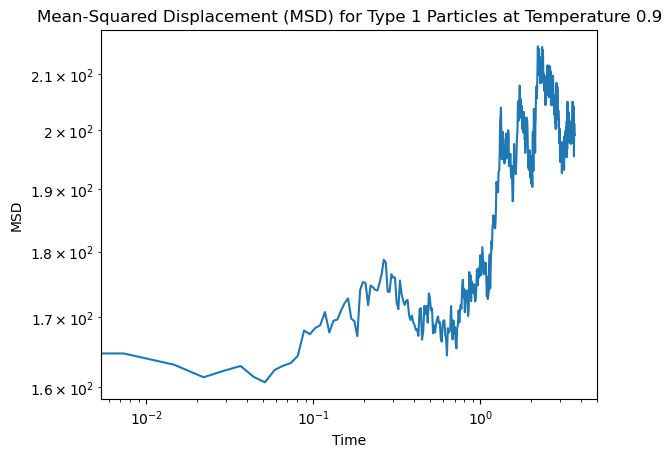

<Figure size 640x480 with 0 Axes>

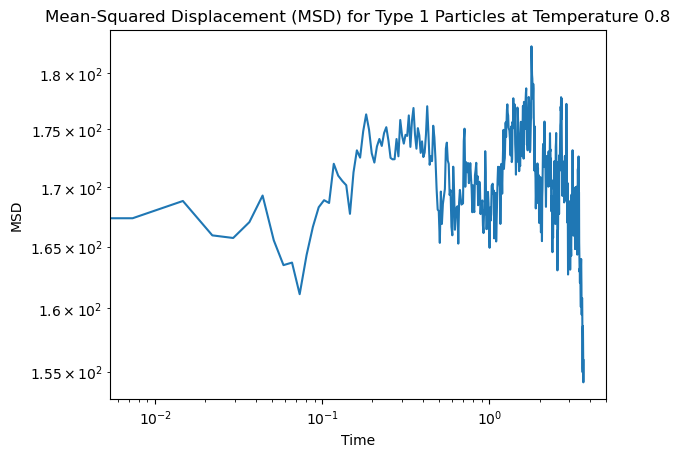

<Figure size 640x480 with 0 Axes>

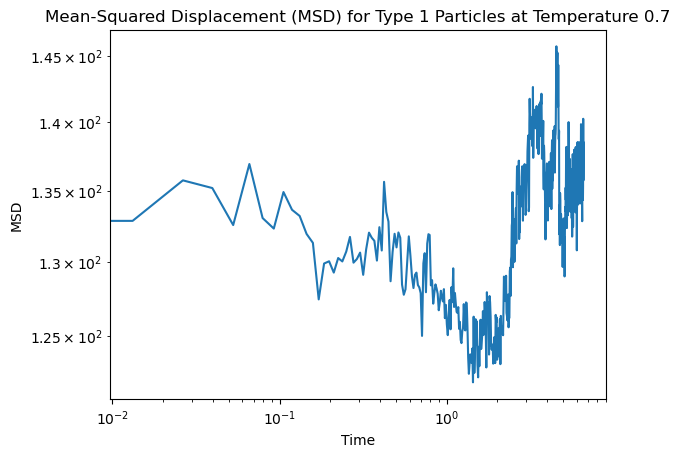

<Figure size 640x480 with 0 Axes>

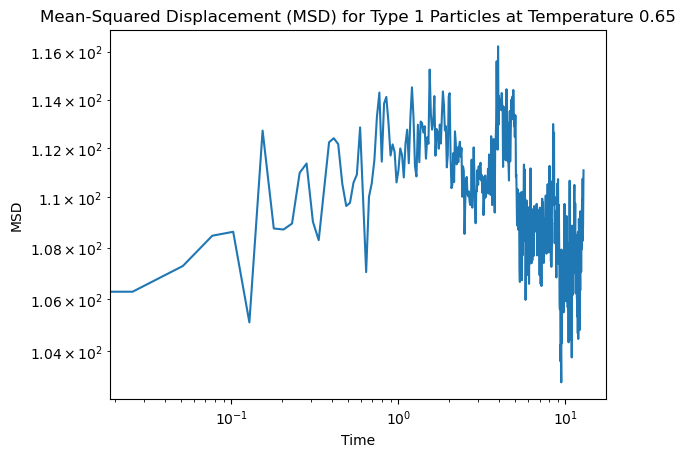

<Figure size 640x480 with 0 Axes>

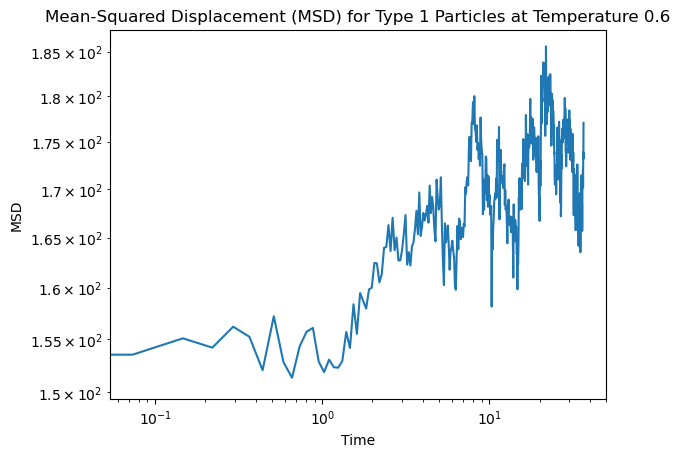

<Figure size 640x480 with 0 Axes>

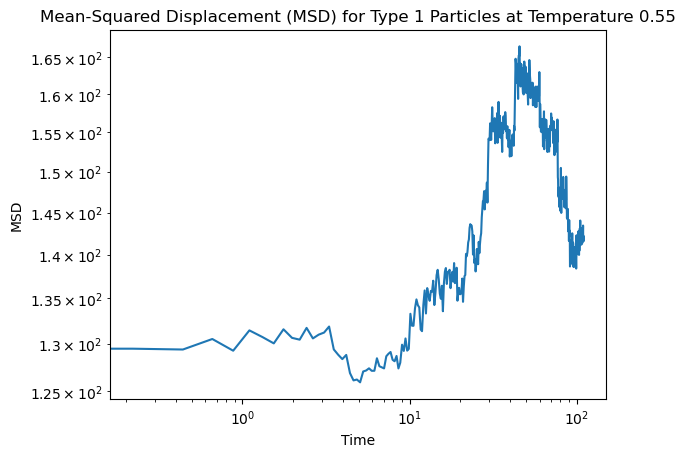

OSError: DCD file does not exist

<Figure size 640x480 with 0 Axes>

In [8]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

temperature_files = {
    1.5: "kalj_T1.5_n480_v400_10000_1",
    1.0: "kalj_T1_n480_v400_50000_1",
    0.9: "kalj_T0.9_n480_v400_150000_1",
    0.8: "kalj_T0.8_n480_v400_150000_1",
    0.7: "kalj_T0.7_n480_v400_180000_1",
    0.65: "kalj_T0.65_n480_v400_350000_1",
    0.6: "kalj_T0.6_n480_v400_1000000_1",
    0.55: "kalj_T0.55_n480_v400_3000000_1",
    0.5: "kalj_T0.5_n480_v400_10000000_1",
    # 0.475: "kalj_T0.475_n480_v400_300000000_1"
}

for T, filename in temperature_files.items():
    u = mda.Universe(f"./Data/equil/{filename}.lammpstrj", 
                     f"./Data/prod/{filename}.unwrap.dcd", 
                     topology_format="LAMMPSDUMP")
    
    type1 = u.select_atoms("type 1")
    
    n_frames = len(u.trajectory)
    msd = np.zeros(n_frames)
    time = np.arange(n_frames) * u.trajectory.dt  # 시간 데이터
    
    for ts in u.trajectory:
        displacements = type1.positions - type1.positions[0]
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[ts.frame] = np.mean(squared_displacements)
    
    plt.figure()
    plt.loglog(time, msd)
    plt.xlabel("Time")
    plt.ylabel("MSD")
    plt.title(f"Mean-Squared Displacement (MSD) for Type 1 Particles at Temperature {T}")
    plt.show()

    plt.savefig(f"./figures/n480/MSD_T{T}.png")

/state/partition1/job-53109186/ipykernel_261789/610769276.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig(f"./figures/n480/Time_at_MSD_1_vs_1_over_T.png")


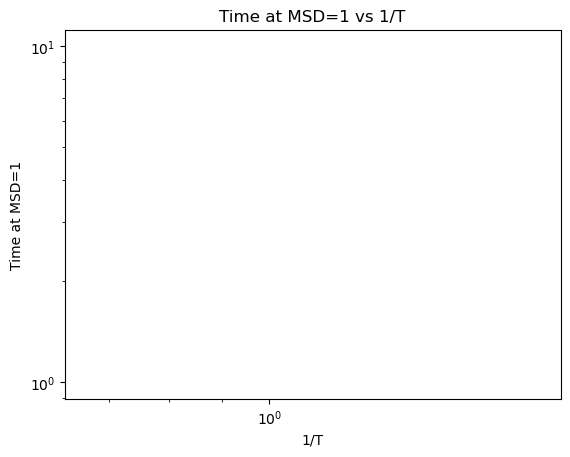

In [13]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import os


temperature_files = {
    1.5: "kalj_T1.5_n480_v400_10000_1",
    1.0: "kalj_T1_n480_v400_50000_1",
    0.9: "kalj_T0.9_n480_v400_150000_1",
    0.8: "kalj_T0.8_n480_v400_150000_1",
    0.7: "kalj_T0.7_n480_v400_180000_1",
    0.65: "kalj_T0.65_n480_v400_350000_1",
    0.6: "kalj_T0.6_n480_v400_1000000_1",
    0.55: "kalj_T0.55_n480_v400_3000000_1",
    # 0.5: "kalj_T0.5_n480_v400_10000000_1",
    # 0.475: "kalj_T0.475_n480_v400_300000000_1"
}

target_msd = 1  
msd1_times = []  
valid_temperatures = []  

for T, filename in temperature_files.items():
    u = mda.Universe(f"./Data/equil/{filename}.lammpstrj", 
                     f"./Data/prod/{filename}.unwrap.dcd", 
                     topology_format="LAMMPSDUMP")
    
    type1 = u.select_atoms("type 1")
    
    n_frames = len(u.trajectory)
    msd = np.zeros(n_frames)
    time = np.arange(n_frames) * u.trajectory.dt
    
    for ts in u.trajectory:
        displacements = type1.positions - type1.positions[0]
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[ts.frame] = np.mean(squared_displacements)
    
    try:
        time_msd1 = time[np.where(msd >= target_msd)[0][0]]
        msd1_times.append(time_msd1)
        valid_temperatures.append(T)
    except IndexError:
        print(f"MSD did not reach 1 at temperature {T}")
        continue

inv_temperatures = 1 / np.array(valid_temperatures)
plt.figure()
plt.loglog(inv_temperatures, msd1_times, marker='o')
plt.xlabel("1/T")
plt.ylabel("Time at MSD=1")
plt.title("Time at MSD=1 vs 1/T")
plt.savefig(f"./figures/n480/Time_at_MSD_1_vs_1_over_T.png")
plt.show()